In [24]:
import numpy as np
from keras.datasets import reuters
from keras.utils import to_categorical
from keras import models
from keras import layers
from keras import optimizers

import matplotlib.pyplot as plt

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

   8192/2110848 [..............................] - ETA: 0s

  90112/2110848 [>.............................] - ETA: 1s

 393216/2110848 [====>.........................] - ETA: 0s

 876544/2110848 [===========>..................] - ETA: 0s

1409024/2110848 [===================>..........] - ETA: 0s

1998848/2110848 [===========================>..] - ETA: 0s

2113536/2110848 [==============================] - 0s 0us/step


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

  8192/550378 [..............................] - ETA: 0s

 81920/550378 [===>..........................] - ETA: 0s

196608/550378 [=========>....................] - ETA: 0s

524288/550378 [===========================>..] - ETA: 0s

557056/550378 [==============================] - 0s 0us/step


In [14]:
# Vectorize data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [16]:
# Vectorize labels
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [19]:
# Build model
network = models.Sequential()
network.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
network.add(layers.Dense(64, activation='relu'))
network.add(layers.Dense(46, activation='softmax'))

In [20]:
# Compile model
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [21]:
# Split validation datasets
x_val = x_train[:1000]
y_val = y_train[:1000]

partial_x_train = x_train[1000:]
partial_y_train = y_train[1000:]

In [ ]:
# Train model
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

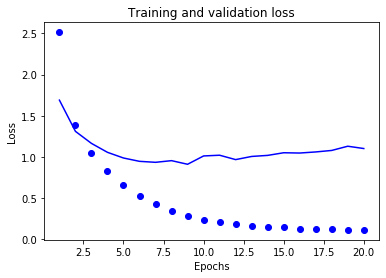

In [25]:
# Draw losses of training and validation
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

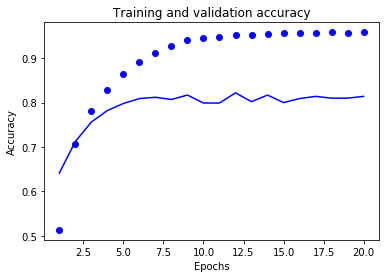

In [28]:
# Draw losses of training and validation
history_dict = history.history
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

从图像可以看出模型在第9轮开始过拟合, 选择EPOCHS为9 重新开始训练模型

In [ ]:
history = network.fit(partial_x_train,
                    partial_y_train,
                    epochs=9,
                    batch_size=512,
                    validation_data=(x_val, y_val))

In [30]:
# Evaluate model
results = network.evaluate(x_test, y_test)
print(results)

 1/71 [..............................] - ETA: 0s - loss: 0.7036 - accuracy: 0.9062

51/71 [====================>.........] - ETA: 0s - loss: 1.3194 - accuracy: 0.7868

71/71 [==============================] - 0s 1ms/step - loss: 1.3514 - accuracy: 0.7841


[1.3514419794082642, 0.784060537815094]


In [31]:
# Calculate the accuracy of random results
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array)) / len(test_labels))

0.18432769367764915


训练后的模型,在测试集上的精度为0.78, 随机精度为0.18. 和随机精度相比,结果很不错.

In [ ]:
# Enode labels to integrate and change the loss function
y_train = np.array(train_labels)
y_test = np.array(test_labels)
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])